In [10]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.datasets import cifar10 
import matplotlib.pyplot as plt
import tensorflow.keras as K

In [11]:
from keras.applications.vgg16 import VGG16

In [12]:
from keras.utils import np_utils 

In [13]:
def preprocess_data(X, Y):
        """ This method has the preprocess to train a model """
        X = X.astype('float32')
        X_p = K.applications.vgg16.preprocess_input(X)
        Y_p = K.utils.to_categorical(Y, 10)
        return(X_p, Y_p)

In [14]:
(Xt, Yt), (X, Y) = cifar10.load_data()

In [15]:
X_p, Y_p = preprocess_data(Xt, Yt)
Xv_p, Yv_p = preprocess_data(X, Y)

In [16]:
base_model = VGG16(include_top=False,weights='imagenet',pooling='avg')

In [17]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Input,UpSampling2D

In [18]:
model= Sequential()
model.add(UpSampling2D())
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation=('relu'))) 
model.add(Dropout(0.2))
model.add(Dense(256, activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(10, activation=('softmax')))

In [19]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f56e299d810>>

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [21]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(x=X_p, y=Y_p,
              batch_size=128,
              validation_data=(Xv_p, Yv_p),
              epochs=10, shuffle=True,
              callbacks=[checkpoint,early],
              verbose=1
              )
print("Fitting the model completed.")

Epoch 1/10
391/391 [==============================] - ETA: 0s - loss: 2.1673 - accuracy: 0.1917
Epoch 1: val_accuracy improved from -inf to 0.28400, saving model to vgg16_1.h5
391/391 [==============================] - 67s 153ms/step - loss: 2.1673 - accuracy: 0.1917 - val_loss: 1.7730 - val_accuracy: 0.2840
Epoch 2/10
391/391 [==============================] - ETA: 0s - loss: 1.5847 - accuracy: 0.3918
Epoch 2: val_accuracy improved from 0.28400 to 0.48640, saving model to vgg16_1.h5
391/391 [==============================] - 59s 150ms/step - loss: 1.5847 - accuracy: 0.3918 - val_loss: 1.3564 - val_accuracy: 0.4864
Epoch 3/10
391/391 [==============================] - ETA: 0s - loss: 1.2287 - accuracy: 0.5502
Epoch 3: val_accuracy improved from 0.48640 to 0.61280, saving model to vgg16_1.h5
391/391 [==============================] - 60s 153ms/step - loss: 1.2287 - accuracy: 0.5502 - val_loss: 1.0605 - val_accuracy: 0.6128
Epoch 4/10
391/391 [==============================] - ETA: 0s - 

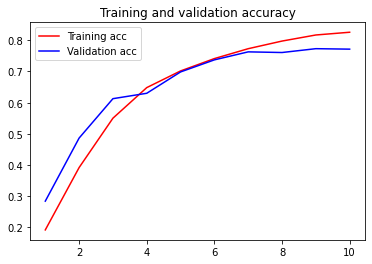

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.figure()
plt.show()